# Project-1
The nearest neighbor classifier requires finding nearest neighbor using distance metrics (known 
as 𝑙𝑝norms). You are required to write a python function that takes two arrays (2D vectors) as 
input, and find nearest of each Array 1 data point in Array 2. More specifically:
 The function should calculate distance of one data point of Array1, with all data points 
of Array 2, and find its nearest in Array 2. 
 This should be repeated for all points of Array 1.
 The function should also take norm identifier (as 1,2,or ∞) as input, and select the 
distance metric accordingly.
 The function should return an array containing pairs of data points which are closest.


In [137]:
import numpy as np

def calculate_distance(p1, p2, norm):
    "Calculate the distance between two vectors x and y based on the given norm."
    if norm == 1:
        return np.sum(np.abs(p1 - p2))
    elif norm == 2:
        return np.sqrt(np.sum((p1 - p2) ** 2))
    elif norm == np.inf:
        return np.max(np.abs(p1 - p2))
    else:
        raise ValueError("Invalid norm specified. Use 1, 2, or np.inf.")

def nearest_neighbors(array1, array2, norm):
    array1 = np.array(array1)
    array2 = np.array(array2)   
    nearest_pairs = []
    for point1 in array1:
        distances = [calculate_distance(point1, point2, norm) for point2 in array2]
        print(f"Distances from point {point1} to all points in array2: {distances}")
        nearest_index = np.argmin(distances)
        nearest_point2 = array2[nearest_index]
        nearest_pairs.append((point1, nearest_point2))
    return nearest_pairs

In [135]:
array1 = np.array([[8, 2], [0, 11], [10, 6]])
array2 = np.array([[5, 1], [4, 10], [6, 4]])

for norm in [1, 2, np.inf]:
    print(f"\nTesting with norm = {norm}")
    result = nearest_neighbors(array1, array2, norm)
print("\nClosest points pairs:")
for pairs in result:
    print(pairs)


Testing with norm = 1
Distances from point [8 2] to all points in array2: [4, 12, 4]
Distances from point [ 0 11] to all points in array2: [15, 5, 13]
Distances from point [10  6] to all points in array2: [10, 10, 6]

Testing with norm = 2
Distances from point [8 2] to all points in array2: [3.1622776601683795, 8.94427190999916, 2.8284271247461903]
Distances from point [ 0 11] to all points in array2: [11.180339887498949, 4.123105625617661, 9.219544457292887]
Distances from point [10  6] to all points in array2: [7.0710678118654755, 7.211102550927978, 4.47213595499958]

Testing with norm = inf
Distances from point [8 2] to all points in array2: [3, 8, 2]
Distances from point [ 0 11] to all points in array2: [10, 4, 7]
Distances from point [10  6] to all points in array2: [5, 6, 4]

Closest points pairs:
(array([8, 2]), array([6, 4]))
(array([ 0, 11]), array([ 4, 10]))
(array([10,  6]), array([6, 4]))


# visualization of data points and shortest distance between two points


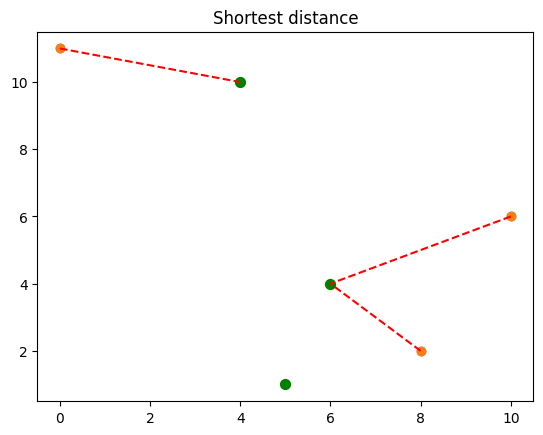

In [136]:
import matplotlib.pyplot as plt
plt.title("Shortest distance")
x_array1,y_array1=zip(*array1) #x-asiz,y-asix
x_array2,y_array2=zip(*array2) #x-asiz,y-asix
plt.scatter(x_array1,y_array1)
plt.scatter(x_array2,y_array2,c="g",s=50)

x_array1, y_array1 = zip(*array1)
x_array2, y_array2 = zip(*array2)

plt.scatter(x_array1, y_array1)
plt.scatter(x_array2, y_array2, c="g")

for i in range(len(result)):
    x,y=zip(*result[i])
    plt.plot(x, y, color='red', linestyle='--')
plt.show()